<a href="https://colab.research.google.com/github/jungeun919/Keras_study/blob/main/Hands-On/Training_Linear_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀

In [ ]:
# 정규방정식 테스트를 위한 가상의 데이터 생성
import numpy as np

# 100개를 만듦 (행: 100, 열: 1)
X = 2 * np.random.rand(100, 1) # training data feature의 range를 [0, 1] -> [0, 2]로 변경하기 위해 2를 곱함
y = 4 + 3 * X + np.random.rand(100, 1) # prediction 식, np.random.rand()는 noise

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가, 1로 채워진 100 * 1 행렬은 만든 뒤 행렬을 붙임 (-> 100 * 2)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 정규방정식
# inv(): 사용해 역행렬 계산
# dot(): 행렬 곱셈 계산

theta_best # 정규방정식으로 계산한 값 확인

array([[4.41752837],
       [3.05959311]])

In [ ]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0 = 1을 추가
# [1  0
#  1  2]

y_predict = X_new_b.dot(theta_best)
y_predict # X_new에 대한 예측값 확인

array([[ 4.41752837],
       [10.53671459]])

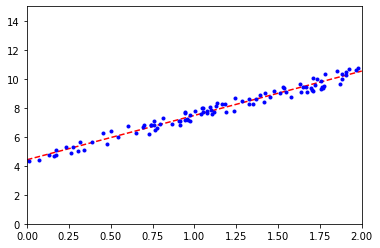

In [ ]:
# 모델의 예측을 그래프화
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r--")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [ ]:
# 사이킷런으로 선형회귀 예측
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) # 훈련
lin_reg.intercept_, lin_reg.coef_ # 세타0, 세타1에 대한 값 확인

(array([4.41752837]), array([[3.05959311]]))

In [ ]:
lin_reg.predict(X_new) # X_new에 대한 예측값 확인

array([[ 4.41752837],
       [10.53671459]])

In [ ]:
# LinearRegression 클래스는 scipy.linalg.lstsq 함수를 기반으로 함
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.41752837],
       [3.05959311]])

In [ ]:
np.linalg.pinv(X_b).dot(y) # 유사역행렬 구하기

array([[4.41752837],
       [3.05959311]])

# 경사하강법

In [ ]:
# 파라미터 결정
eta = 0.1 # 학습률
n_iterations = 1000 # 반복 횟수
m = 100 # 데이터 개수

# 찾아야 할 모델 파라미터
theta = np.random.randn(2, 1) # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 기울기 구하기
    theta = theta - eta * gradients # theta 갱신, 내려가는 스텝의 크기를 결정하기 위해 gradient 벡터에 학습률을 곱함

theta # 값 확인 (정규방정식으로 찾은 결과와 동일)

array([[4.41752837],
       [3.05959311]])

In [ ]:
# 학습 스케줄을 사용한 확률적 경사하강법
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # random_index에 해당하는 샘플
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients # theta 업데이트

theta # 값 확인

array([[4.42017273],
       [3.08263507]])

In [ ]:
# 사이킷런을 활용하여 SGD
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) # 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행
sgd_reg.fit(X, y.ravel()) # 훈련 사이킷런을 활용하여 SGD

sgd_reg.intercept_, sgd_reg.coef_ # 정규방정식으로 구한 값과 유사한 값값

(array([4.35302372]), array([3.06917794]))

# 다항회귀

In [ ]:
import numpy as np

np.random.seed(42)

In [ ]:
# 데이터셋 생성
# 각 특성의 거듭제곱이나 특성간의 곱을 새로운 특성으로 확장하여 선형회귀를 적용
m = 100
X = 6 * np.random.rand(m, 1) - 3 # X의 범위: [0, 1] -> [0, 6] -> [-3, 3]의 분포를 가짐 데이터셋 생성
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # np.random.randn()는 noise

In [ ]:
# 훈련 데이터 변환
from sklearn.preprocessing import PolynomialFeatures

# 훈련세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가
# X_poly는 원래 특성 X와 이 특성의 제곱을 포함
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [ ]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [ ]:
# 확장된 훈련 데이터에 LinearRegression 적용
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))